<a href="https://colab.research.google.com/github/adithyaak387/Stock_Prediction_Using_LSTM_and_Federated_Learning/blob/main/FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Federated Learning

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.17.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.17.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Atte

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - loss: 0.1732
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0455
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0258
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0149
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0096
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0091
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0076
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0070
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0063
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0056
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step
Model Accuracy (MAPE): 98.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted N225 Index for next day: 38297.01536457508
Previous Close: 38596.46875
SMA: 38691.75446428572
EMA: 38638.308743171765
RSI: 49.13707092496509
MACD: -19.81891511670983
Volume: 140800000.0
Open: 38608.66015625
High: 38795.6796875
Low: 38532.12

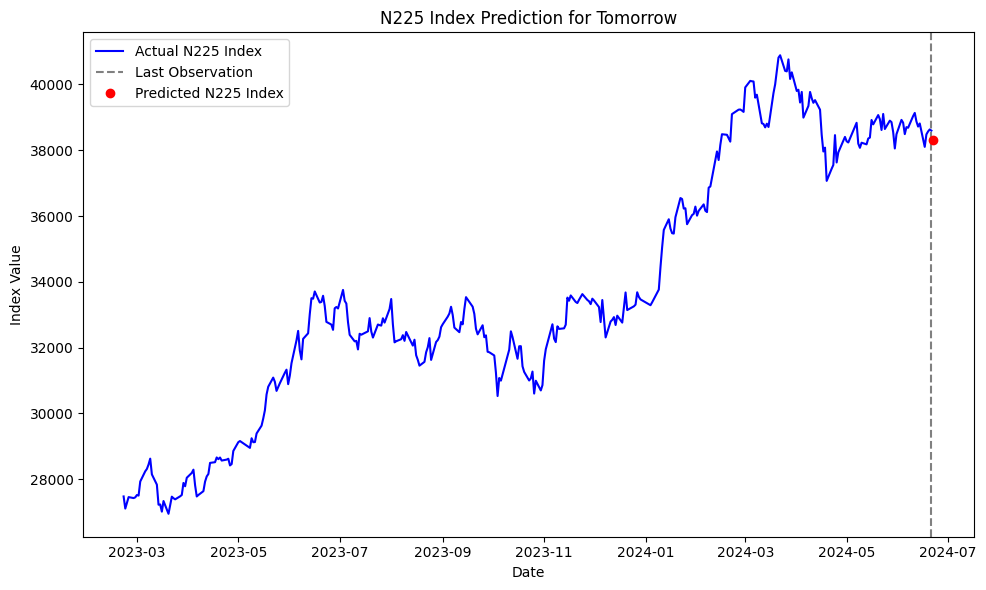

In [12]:
!pip install ta
!pip install --upgrade tensorflow

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import ta
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data
def add_technical_indicators(data):
    # Add Simple Moving Average (SMA)
    data['SMA'] = ta.trend.sma_indicator(data['Close'], window=14)
    # Add Exponential Moving Average (EMA)
    data['EMA'] = ta.trend.ema_indicator(data['Close'], window=14)
    # Add Relative Strength Index (RSI)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    # Add MACD
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    # Ensure no NaN values
    data = data.dropna()
    return data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])  # Predicting the closing price
    return np.array(X), np.array(y)
def split_data(X, y, train_ratio):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test
def build_model(seq_length, feature_count):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, feature_count)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def main():
    ticker_ftse = '^N225'
    #ticker_ftse = '^NYA'
    #ticker_ftse = '^FTSE'
    #ticker_ftse = '^BSESN'
    start_date = '2023-01-01'
    end_date = '2024-06-22'
    seq_length = 60
    train_ratio = 0.8
    data_ftse = fetch_stock_data(ticker_ftse, start_date, end_date)
    data_ftse = add_technical_indicators(data_ftse)
    feature_columns = ['Close', 'SMA', 'EMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff',
                       'Volume', 'Open', 'High', 'Low']
    data_ftse_features = data_ftse[feature_columns]
    scaled_data_ftse, scaler_ftse = preprocess_data(data_ftse_features)
    X_ftse, y_ftse = create_sequences(scaled_data_ftse, seq_length)
    X_train, X_test, y_train, y_test = split_data(X_ftse, y_ftse, train_ratio)
    model_ftse = build_model(seq_length, X_train.shape[2])
    model_ftse.fit(X_train, y_train, epochs=10, batch_size=32)
    y_pred = model_ftse.predict(X_test)
    y_test_scaled = y_test.reshape(-1, 1)
    y_test_inv = scaler_ftse.inverse_transform(
        np.hstack((y_test_scaled, np.zeros((y_test_scaled.shape[0], scaled_data_ftse.shape[1] - 1))))
    )[:, 0]
    y_pred_inv = scaler_ftse.inverse_transform(
        np.hstack((y_pred, np.zeros((y_pred.shape[0], scaled_data_ftse.shape[1] - 1))))
    )[:, 0]
    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
    print(f"Model Accuracy (MAPE): {100 - mape:.2f}%")
    last_sequence_ftse = scaled_data_ftse[-seq_length:].reshape(1, seq_length, X_ftse.shape[2])
    prediction_ftse = model_ftse.predict(last_sequence_ftse)
    prediction_ftse = scaler_ftse.inverse_transform(
        np.hstack((prediction_ftse, np.zeros((prediction_ftse.shape[0], scaled_data_ftse.shape[1] - 1))))
    )[:, 0][0]
    print(f"Predicted N225 Index for next day: {prediction_ftse}")
    #print(f"Predicted NYA 100 Index for next day: {prediction_ftse}")
    #print(f"Predicted FTSE 100 Index for next day: {prediction_ftse}")
    #print(f"Predicted BSESN 100 Index for next day: {prediction_ftse}")
    last_row = data_ftse.iloc[-1]
    print(f"Previous Close: {last_row['Close']}")
    print(f"SMA: {last_row['SMA']}")
    print(f"EMA: {last_row['EMA']}")
    print(f"RSI: {last_row['RSI']}")
    print(f"MACD: {last_row['MACD']}")
    print(f"Volume: {last_row['Volume']}")
    print(f"Open: {last_row['Open']}")
    print(f"High: {last_row['High']}")
    print(f"Low: {last_row['Low']}")
    plt.figure(figsize=(10, 6))
    plt.plot(data_ftse.index, data_ftse['Close'], label='Actual N225 Index', color='blue')
    plt.axvline(x=data_ftse.index[-1], linestyle='--', color='gray', label='Last Observation')
    plt.plot(data_ftse.index[-1] + pd.Timedelta(days=1), prediction_ftse, 'ro', label='Predicted N225 Index')
    plt.title('N225 Index Prediction for Tomorrow')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #plt.figure(figsize=(10, 6))
    #plt.plot(data_ftse.index, data_ftse['Close'], label='Actual NYA 100 Index', color='blue')
    #plt.axvline(x=data_ftse.index[-1], linestyle='--', color='gray', label='Last Observation')
    #plt.plot(data_ftse.index[-1] + pd.Timedelta(days=1), prediction_ftse, 'ro', label='Predicted NYA 100 Index')
    #plt.title('NYA 100 Index Prediction for Tomorrow')
    #plt.xlabel('Date')
    #plt.ylabel('Index Value')
    #plt.legend()
    #plt.tight_layout()
    #plt.show()
    #plt.figure(figsize=(10, 6))
    #plt.plot(data_ftse.index, data_ftse['Close'], label='Actual FTSE 100 Index', color='blue')
    #plt.axvline(x=data_ftse.index[-1], linestyle='--', color='gray', label='Last Observation')
    #plt.plot(data_ftse.index[-1] + pd.Timedelta(days=1), prediction_ftse, 'ro', label='Predicted FTSE 100 Index')
    #plt.title('FTSE 100 Index Prediction for Tomorrow')
    #plt.xlabel('Date')
    #plt.ylabel('Index Value')
    #plt.legend()
    #plt.tight_layout()
    #plt.show()
    #plt.figure(figsize=(10, 6))
    #plt.plot(data_ftse.index, data_ftse['Close'], label='Actual BSESN 100 Index', color='blue')
    #plt.axvline(x=data_ftse.index[-1], linestyle='--', color='gray', label='Last Observation')
    #plt.plot(data_ftse.index[-1] + pd.Timedelta(days=1), prediction_ftse, 'ro', label='Predicted BSESN 100 Index')
    #plt.title('BSESN 100 Index Prediction for Tomorrow')
    #plt.xlabel('Date')
    #plt.ylabel('Index Value')
    #plt.legend()
    #plt.tight_layout()
    #plt.show()
main()

In [1]:
!pip install --upgrade tensorflow-federated
!pip install tensorflow tensorflow-federated yfinance pandas scikit-learn ta
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_federated as tff
import ta

# Define tickers for different stock exchanges
tickers = {
    'London Stock Exchange': '^FTSE',
    'Bombay Stock Exchange': '^BSESN',
    'Tokyo Stock Exchange': '^N225',
    'New York Stock Exchange': '^NYA',

}

# Function to fetch stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to add technical indicators using TA-Lib
def add_technical_indicators(data):
    data['SMA'] = ta.trend.sma_indicator(data['Close'], window=14)
    data['EMA'] = ta.trend.ema_indicator(data['Close'], window=14)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    data = data.dropna()
    return data

# Function to preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])  # Predicting the closing price
    return np.array(X), np.array(y)

# Function to split data into training and testing sets
def split_data(X, y, train_ratio):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

# Function to create a Keras LSTM model
def create_keras_model(seq_length, feature_count):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, feature_count)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to calculate mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Main function to run the federated learning process
def main():
    start_date = '2023-01-01'
    end_date = '2024-06-22'
    seq_length = 60
    train_ratio = 0.8
    client_data = []

    for name, ticker in tickers.items():
        # Fetch stock data
        stock_data = fetch_stock_data(ticker, start_date, end_date)
        # Add technical indicators
        stock_data = add_technical_indicators(stock_data)
        # Select feature columns
        feature_columns = ['Close', 'SMA', 'EMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff',
                           'Volume', 'Open', 'High', 'Low']
        data_features = stock_data[feature_columns]
        # Preprocess data
        scaled_data, scaler = preprocess_data(data_features)
        # Create sequences
        X, y = create_sequences(scaled_data, seq_length)
        # Split data
        X_train, X_test, y_train, y_test = split_data(X, y, train_ratio)

        # Build and train Keras LSTM model
        model = create_keras_model(seq_length, X_train.shape[2])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Evaluate model accuracy
        y_pred = model.predict(X_test)
        y_test_scaled = y_test.reshape(-1, 1)
        y_test_inv = scaler.inverse_transform(
            np.hstack((y_test_scaled, np.zeros((y_test_scaled.shape[0], scaled_data.shape[1] - 1))))
        )[:, 0]
        y_pred_inv = scaler.inverse_transform(
            np.hstack((y_pred, np.zeros((y_pred.shape[0], scaled_data.shape[1] - 1))))
        )[:, 0]
        mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
        print(f"Model Accuracy (MAPE) for {name}: {100 - mape:.2f}%")

        # Predict next day's index value
        if len(stock_data) >= seq_length:
            last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, scaled_data.shape[1])
            prediction = model.predict(last_sequence)
            prediction_inv = scaler.inverse_transform(
                np.hstack((prediction, np.zeros((prediction.shape[0], scaled_data.shape[1] - 1))))
            )[:, 0][0]
            print(f"Predicted {name} Index for next day: {prediction_inv}")
        else:
            print(f"Not enough data points to predict for {name}.")

    # Additional plotting or saving results can be added here if needed


main()

[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 23ms/step
Model Accuracy (MAPE) for London Stock Exchange: 97.41%
1/1 [==============================] - 0s 32ms/step
Predicted London Stock Exchange Index for next day: 8000.181948709331


[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 24ms/step
Model Accuracy (MAPE) for Bombay Stock Exchange: 98.17%
1/1 [==============================] - 0s 30ms/step
Predicted Bombay Stock Exchange Index for next day: 75267.97164868191


[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 2s 24ms/step
Model Accuracy (MAPE) for Tokyo Stock Exchange: 97.97%
1/1 [==============================] - 0s 31ms/step
Predicted Tokyo Stock Exchange Index for next day: 39066.286447401275


[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 25ms/step
Model Accuracy (MAPE) for New York Stock Exchange: 96.90%
1/1 [==============================] - 0s 31ms/step
Predicted New York Stock Exchange Index for next day: 18475.285575135258
